       y     x1   x2     x3      x4      x5  x6  x7     x8    x9   x10 x11
0  18.90  350.0  165  260.0   8.0:1  2.56:1   4   3  200.3  69.9  3910   A
1  17.00  350.0  170  275.0   8.5:1  2.56:1   4   3  199.6  72.9  2860   A
2  20.00  250.0  105  185.0  8.25:1  2.73:1   1   3  196.7  72.2  3510   A
3  18.25  351.0  143  255.0   8.0:1  3.00:1   2   3  199.9  74.0  3890   A
4  20.07  225.0   95  170.0   8.4:1  2.76:1   1   3  194.1  71.8  3365   M

n_samples:  32

n_features:  11

-----------
a. Construct a normal probability plot of the residuals. Does there seem to be any problem with the normality assumption?



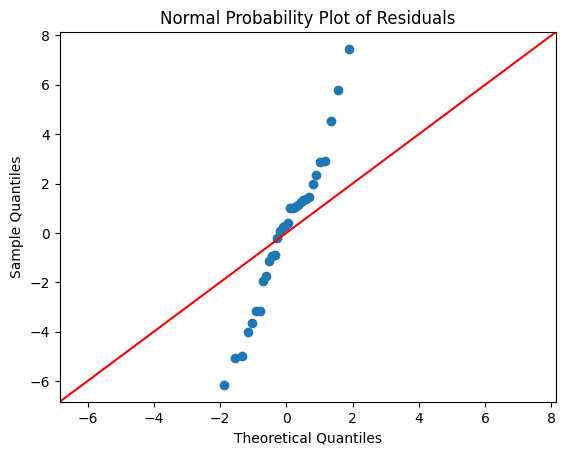


-----------

b. Construct and interpret a plot of the residuals versus the predicted response.



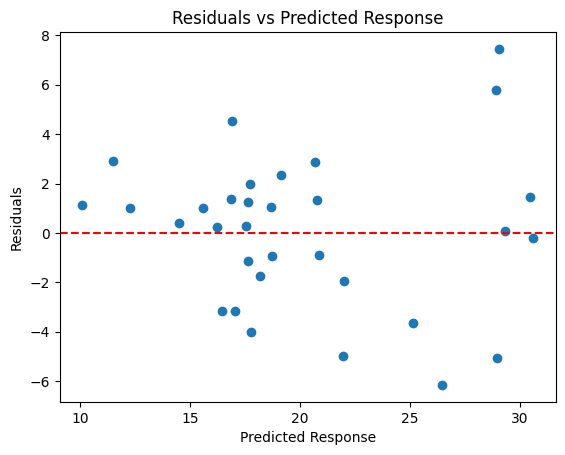


-----------

c. Construct the partial regression plots for this model. Compare the plots with the plots of residuals versus regressors from part c above. Discuss the type of information provided by these plots.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


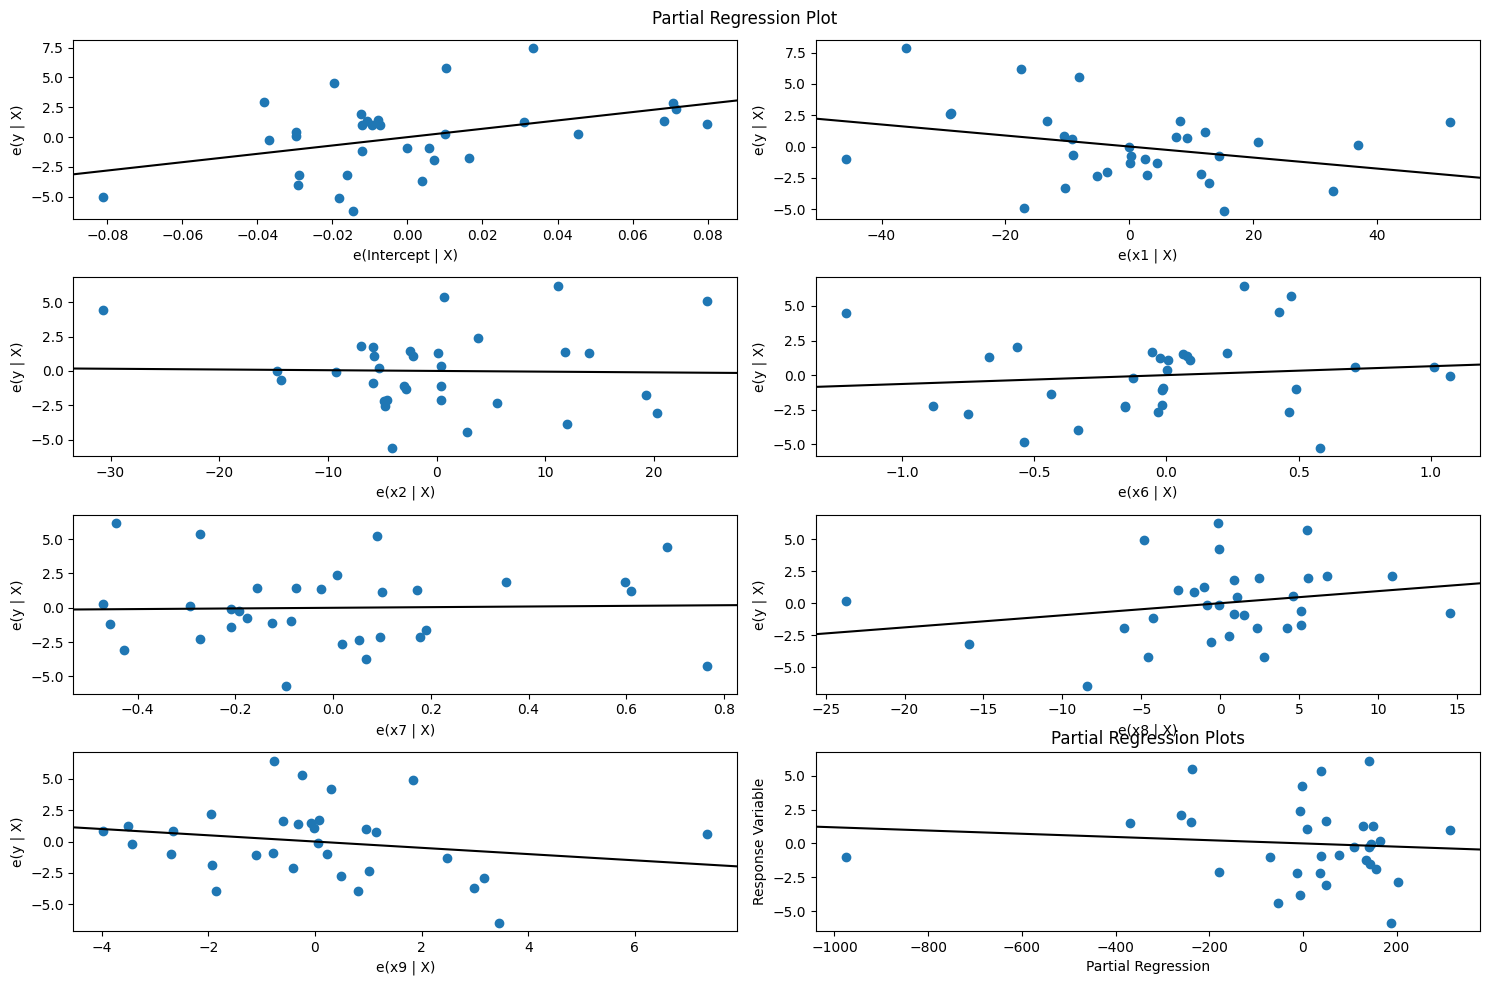

d. Compute the studentized residuals and the R - student residuals for this model. What information is conveyed by these scaled residuals?

Studentized Residuals:
[ 0.05643516 -1.18229397 -0.37100158  0.6067719  -0.75356408 -0.80121229
 -0.36669695 -0.05529996  1.87958768  0.38961528 -0.25710247  2.22724866
 -1.25709721  1.29289418 -1.98721785 -0.2974531   1.83116102  0.5240389
 -0.02500255 -0.77992688  0.13665878  1.9791169   0.43320613  0.63187258
  0.38051305  0.49634274 -1.69905653  0.49760198 -0.71720231 -0.89136718
 -1.13120807 -0.45535623]

R-Student Residuals:
[ 0.05525058 -1.19265331 -0.36423611  0.59860553 -0.74658304 -0.79504763
 -0.35998603 -0.05413907  1.99249766  0.3826239  -0.25203651  2.44797181
 -1.27326212  1.31219342 -2.12834367 -0.29172847  1.93269605  0.5159657
 -0.02447644 -0.77336904  0.13383351  2.1179711   0.42575283  0.62377885
  0.3736301   0.48840541 -1.77335076  0.48965742 -0.70974865 -0.88741226
 -1.13814798 -0.4477069 ]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_partregress_grid

# Load the dataset
url = 'https://raw.githubusercontent.com/ramirezramiro/linear-reg/main/Multiple%20Linear%20Reg%20(ch.3)/data(ch.3)/table-b3.csv'
df = pd.read_csv(url)

specific_columns = df[["y","x1","x2","x3","x4","x5","x6","x7","x8","x9","x10","x11"]]
print(specific_columns.head())

# Extract the features (X) and target variable (y)
X = specific_columns[["x1","x2","x6","x7","x8","x9","x10"]].values
y = specific_columns["y"].values

n_samples = len(y)
print("\nn_samples: ", n_samples)

n_features = len(specific_columns.columns) - 1
print("\nn_features: ", n_features)

model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
y_pred = results.predict(X)

print("\n-----------")
print("a. Construct a normal probability plot of the residuals. Does there seem to be any problem with the normality assumption?\n")
# Print the mathematical function of the model

sm.qqplot(residuals, line='45')

# Customize the plot
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
# Display the plot
plt.show()
print("\n-----------\n")

print("b. Construct and interpret a plot of the residuals versus the predicted response.\n")

# Plot the residuals versus the predicted response
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Predicted Response')
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')

# Display the plot
plt.show()
print("\n-----------\n")

print("c. Construct the partial regression plots for this model. Compare the plots with the plots of residuals versus regressors from part c above. Discuss the type of information provided by these plots.\n")

model_part_reg = ols("y ~ x1 + x2 + x6 + x7 + x8 + x9 + x10", data=df).fit()
# Construct partial regression plots
fig = plt.figure(figsize=(15, 10))
plot_partregress_grid(model_part_reg, fig=fig)

# Customize the plot
plt.title('Partial Regression Plots')
plt.xlabel('Partial Regression')
plt.ylabel('Response Variable')

# Display the plot
plt.show()

print("d. Compute the studentized residuals and the R - student residuals for this model. What information is conveyed by these scaled residuals?\n")

# Get the influence object
influence = model_part_reg.get_influence()

# Compute the studentized residuals
studentized_residuals = influence.resid_studentized_internal

# Compute the R-student residuals
r_student_residuals = influence.resid_studentized_external

# Print the computed residuals
print("Studentized Residuals:")
print(studentized_residuals)

print("\nR-Student Residuals:")
print(r_student_residuals)

In [ ]:


print("b. Construct and interpret a plot of the residuals versus the predicted response.\n")

# Plot the residuals versus the predicted response
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Predicted Response')
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')

# Display the plot
plt.show()
print("\n-----------\n")

print("c. Construct plots of the residuals versus each of the regressor variables. Do these plots imply that the regressor is correctly specified?\n")
# Plot residuals versus each regressor variable
fig, axs = plt.subplots(nrows=1, ncols=X.shape[1], figsize=(15, 5))
for i, regressor in enumerate(X.T):
    axs[i].scatter(regressor, residuals)
    axs[i].axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
    axs[i].set_xlabel(f'Regressor {i+1}')
    axs[i].set_ylabel('Residuals')

# Add a common title to the subplots
fig.suptitle('Residuals vs Regressor Variables')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

print("\n-----------\n")

print("d. Construct the partial regression plots for this model. Compare the plots with the plots of residuals versus regressors from part c above. Discuss the type of information provided by these plots.\n")

model_part_reg = ols("y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9", data=df).fit()
# Construct partial regression plots
fig = plt.figure(figsize=(15, 10))
plot_partregress_grid(model_part_reg, fig=fig)

# Customize the plot
plt.title('Partial Regression Plots')
plt.xlabel('Partial Regression')
plt.ylabel('Response Variable')

# Display the plot
plt.show()

print("\n-----------\n")

print("e. Compute the studentized residuals and the R - student residuals for this model. What information is conveyed by these scaled residuals?\n")

# Get the influence object
influence = model_part_reg.get_influence()

# Compute the studentized residuals
studentized_residuals = influence.resid_studentized_internal

# Compute the R-student residuals
r_student_residuals = influence.resid_studentized_external

# Print the computed residuals
print("Studentized Residuals:")
print(studentized_residuals)

print("\nR-Student Residuals:")
print(r_student_residuals)